In [ ]:
# 구글 드라이브 연결

from google.colab import drive
import os

drive.mount('/content/drive')

project_path = '/content/drive/MyDrive/examples/2장/data'
os.makedirs(project_path, exist_ok=True)

# 현재 경로를 /content/drive로 설정
os.chdir(project_path)
print("현재 작업 디렉토리:", os.getcwd())

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 10x10 배열을 0으로 초기화
heart = np.zeros((10, 10))

heart = np.array([
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,1,0,0],
    [0,1,1,1,0,0,1,1,1,0],
    [0,1,1,1,1,1,1,1,1,0],
    [0,0,1,1,1,1,1,1,0,0],
    [0,0,0,1,1,1,1,0,0,0],
    [0,0,0,0,1,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    ])


# 바이너리 이미지를 파일로 저장
plt.imsave("heart.png", heart, cmap='gray')


그레이스케일 이미지가 저장된 경로: /content/drive/MyDrive/ch2/heart_gray.png
컬러 이미지가 저장된 경로: /content/drive/MyDrive/ch2/heart_rgb.png


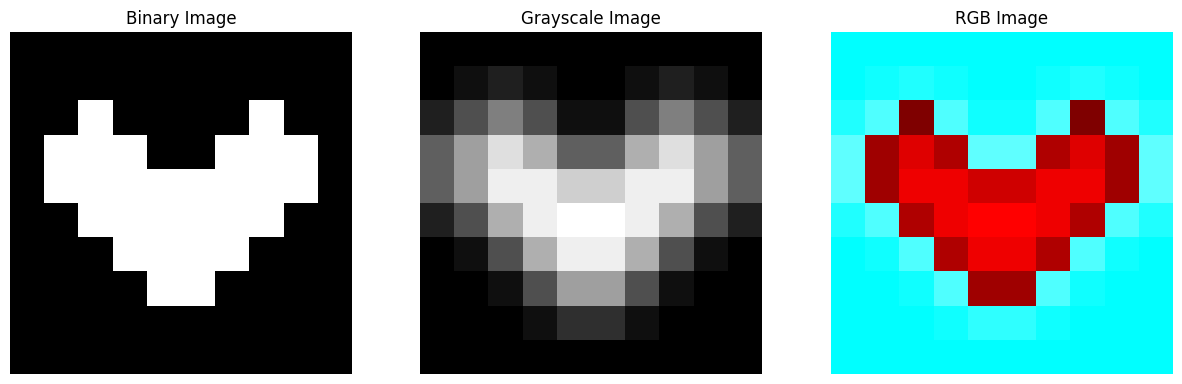

In [ ]:
import cv2

# 이진 이미지를 그레이스케일 이미지로 변환하여 저장
# 가우시안 블러를 적용하여 자연스러운 그레이스케일 이미지 생성
heart_gray = cv2.GaussianBlur(heart.astype(np.float32), (3, 3), 0) * 255
heart_gray = np.clip(heart_gray, 0, 255).astype(np.uint8)  # 0과 255 사이로 클립

# 그레이스케일 이미지 저장
gray_image_path = 'heart_gray.png'
plt.imsave(gray_image_path, heart_gray, cmap='gray')
print("그레이스케일 이미지가 저장된 경로:", os.path.abspath(gray_image_path))

# 이진 이미지를 컬러 이미지로 변환하여 하트는 빨간색으로, 배경은 흰색으로 설정
heart_rgb = np.zeros((heart.shape[0], heart.shape[1], 3), dtype=np.uint8)
heart_rgb[..., 0] = heart_gray  # 빨간색 채널에 그레이스케일 값을 넣기
heart_rgb[..., 1] = (1 - heart) * 255  # 녹색 채널은 배경(흰색)으로 설정
heart_rgb[..., 2] = (1 - heart) * 255  # 파란색 채널은 배경(흰색)으로 설정

# 컬러 이미지 저장
rgb_image_path = 'heart_rgb.png'
plt.imsave(rgb_image_path, heart_rgb)
print("컬러 이미지가 저장된 경로:", os.path.abspath(rgb_image_path))

# 이미지 시각화
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# 이진 이미지 시각화
axs[0].imshow(heart, cmap='gray')
axs[0].set_title('Binary Image')
axs[0].axis('off')

# 그레이스케일 이미지 시각화
axs[1].imshow(heart_gray, cmap='gray')
axs[1].set_title('Grayscale Image')
axs[1].axis('off')

# 컬러 이미지 시각화
axs[2].imshow(heart_rgb)
axs[2].set_title('RGB Image')
axs[2].axis('off')

plt.show()

In [ ]:
heart.shape, heart_gray.shape, heart_rgb.shape

((10, 10), (10, 10), (10, 10, 3))

In [ ]:
os.listdir(project_path)

['heart.png']